<a href="https://colab.research.google.com/github/Migaalee/PAD/blob/main/pca_tutorial2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis and Mining 2020/2021

## Tutorial on Principal Component Analysis and Singular Value Decomposition


Susana Nascimento (2016): "Tutorial on Principal Component Analysis", Course on Data Aanalysis and Mining, Computer Science Dep. and NOVA LINCS, FCT - NOVA University Lisboa

### Objectives 
This tutorial explains how to do Principal Component Analysis and its relationship with Single Value Decomposition.

### Setup

In [ ]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Sklearn for data import and scalers
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#interactive plot
# Please consult information to update plotly.offline 
# e.g. https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee

from plotly.offline import plot
from plotly.graph_objs import *

ModuleNotFoundError: No module named 'plotly'

## Singular Value Decomposition  

### How to plot data along Space Spanned by the Leading Singular Vectors

1. Generate a 2-dimensional data set of $N$= 1000 points modeled by Gaussian distribution, $N(\mu,\Sigma)$ as follows:

In [ ]:
mu = np.array([1, 0.5])
sigma = np.array([[1, 0.6],[0.6, 1]])
data = np.random.multivariate_normal(mu, sigma, 1000)
##print(data)

Subtract the mean variable-wise (row-wise) from the dataset

In [ ]:
row_mean = np.mean(data, axis=0)
center_data = data - row_mean
##print(center_data)

 2 Make a scatter plot of your data.
Check if the data plotted below is according to your expectations given $\mu$ and $\Sigma$.

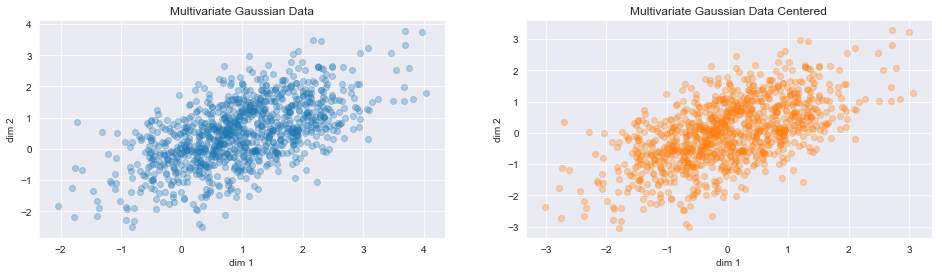

In [ ]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
sns.regplot(x=data[:,0],
            y= data[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3}, ax=ax1)
ax1.set(xlabel='dim 1', 
       ylabel='dim 2',
       title='Multivariate Gaussian Data');

sns.regplot(x=center_data[:,0],
            y= center_data[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3}, ax=ax2)
ax2.set(xlabel='dim 1', 
       ylabel='dim 2',
       title='Multivariate Gaussian Data Centered');

####  3 Calculate Singular Value Decomposition (SVD)

$$X= U S V^\intercal$$

1. $U$ is $N \times N$ matrix of which only the $r$ columns $r= min(N, feature)$ are meaningful;
2. $V$ is $feature \times feature$ matrix of corresponding feature loading columns (normed), of which only $r$ are meaningful;
3. $S$ is $N \times feature$ matrix with $r \times r$ diagonal submatrix of corresponding singular values sorted in the descending order.

Numpy's linear algebra module provides the 'svd' function to compute SVD (https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html )

In [ ]:
u, s, vh = np.linalg.svd(center_data, 
                         full_matrices=True) 

Take centered $N \times features$ data matrix $X$ and (left) multiply it by its transpose $X^\intercal$, seting $A= X^\intercal X$
- $U$ contains $r$ singular vectors corresponding to the eigenvectors of $XX^\intercal$;  
- $V$ contains $r$ singular vectors corresponding to the eigenvectors of $X^\intercal X$;  



  
Draw the unit length's leading eigenvectors over the scatter plot of the centered data.  

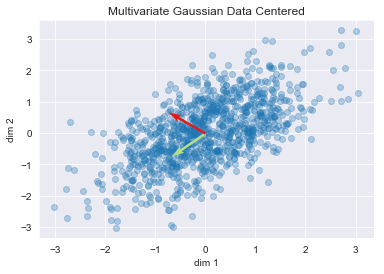

In [ ]:
ax = sns.regplot(x=center_data[:,0],
            y= center_data[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3})

# Draw the Unit EigenVectors
plt.quiver(0, 0, vh[0,0],vh[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a')
plt.quiver(0, 0, vh[0,1],vh[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax.set(xlabel='dim 1', 
       ylabel='dim 2',
       title='Multivariate Gaussian Data Centered');

#### 4 Project the data X on the Space spanned by the $r$ leading Eigenvectors of SVD  

Project the data points of $X$ according to the axes of $U$ (columns), which are
orthogonal.   

What does it means multiplying by $V$?   
 - $V$ is $feature \times feature$ matrix,
containing the eigenvectors of features in the columns.  

- Given a point $x_{1 \times feature}$ in the feature-dimensional space, multiplying it by $V$, means to project the point on each of the corresponfing eigenvectors. 

This yields the coordinates of the point $x$ projected
on the space spanned by the $r$ leading eigenvectors of V.

Since those eigenvectors form an orthogonal basis, what is done is ROTATING the SPACE.  

Since $X = U S V^\intercal$, multiplying by $V$ yields 
$$XV= U S V^\intercal V= U S.$$

The resulting $US$ has the property that the columns are uncorrelated
with one another. 

Since the columns of $U$ are mutually orthogonal and $S$ is a diagonal matrix, multiplying the columns of $U$
by $S$ simply rescales $U$, and thus, it does not change the condition of mutual orthogonality.

In [ ]:
project_data_featureloading = np.dot(center_data, vh.T) # Transpose feature loadings 'vh'
v_norm = np.dot(vh.T,vh)

##### Obs.:  
Numpy 'svd' function returns an array with the diagonal elements of the diagonal matrix $S$. To properly construct the diagonal matrix $S$ use *np.diag(s)*  


In [ ]:
Us_eig = np.dot(u[:,0:2], np.diag(s)) 

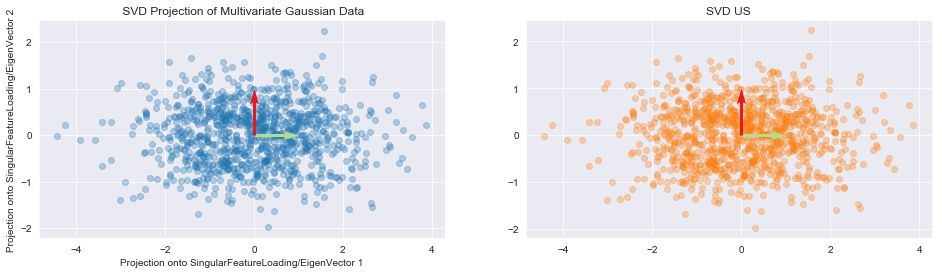

In [ ]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

sns.regplot(x= project_data_featureloading[:,0],
            y= project_data_featureloading[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax1)
ax1.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a')
ax1.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax1.set(xlabel='Projection onto SingularFeatureLoading/EigenVector 1', 
       ylabel='Projection onto SingularFeatureLoading/EigenVector 2',
       title=' SVD Projection of Multivariate Gaussian Data');

sns.regplot(x=Us_eig[:,0],
            y=Us_eig[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax2)
ax2.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a')
ax2.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax2.set(xlabel='', 
       ylabel='',
       title='SVD US');

 ### Visualization of Iris Data by Principal Components / SVD

In [ ]:
data = load_iris()
x_values = data.data
y_values = data.target

#Normalize data by Range
means = x_values.mean(axis=0)
Rmax= x_values.max(axis=0)
Rmin= x_values.min(axis=0)


x_norm= (x_values - means)/(Rmax- Rmin)


 #### 2.1 Calculate the Principal Components (PC's) by the conventional' method
 - Use the covariance matrix of the normalized data to obtain the principal components.
 - Notice the need to transpose the data matrix.

In [ ]:
## Covariance matrix of the normalized dataset
covmatrix = np.cov(x_norm.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e, v = np.linalg.eig(covmatrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(e) * -1))
e = e[order]
v = v[:,order]

print('Eigenvectors \n%s' %e)
print('\nEigenvalues \n%s' %v)

Eigenvectors 
[0.23245325 0.0324682  0.00959685 0.00176432]

Eigenvalues 
[[ 0.42494212 -0.42320271 -0.71357236  0.36213001]
 [-0.15074824 -0.90396711  0.33631602 -0.21681781]
 [ 0.61626702  0.06038308 -0.0659003  -0.78244872]
 [ 0.64568888  0.00983925  0.61103451  0.45784921]]


In [ ]:
# generate PCA component space (PCA scores)
pc = np.dot(x_norm, v)

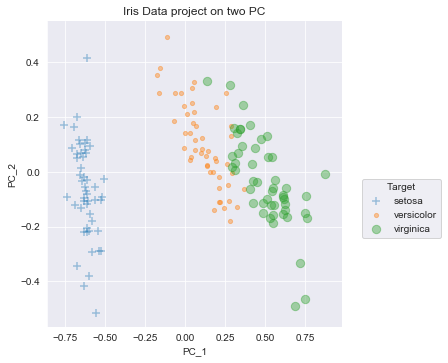

In [ ]:
# set data to a Pandas Dataframa to ease plotting
names = ["PC_"+str(x+1) for x in range(pc.shape[1])]
names.append('target')
data_pca = pd.DataFrame(data= np.c_[pc, y_values], 
                     columns=names)
data_pca['target'] = data_pca['target'].astype(int)


ax = sns.lmplot('PC_1', 
                'PC_2', 
                data=data_pca, 
                hue='target', 
                markers=['+','.','o'],
                fit_reg=False,
                scatter_kws={'alpha':0.4, "s": 70}, 
                legend_out=False)
plt.title('Iris Data project on two PC')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Target', labels = data.target_names);

#### 2.2 Project PCA's on a 3D plot

A possible option for 3D plots in Python is *mplot3d*.

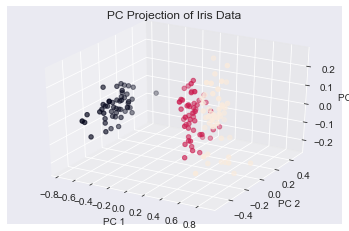

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca['PC_1'], 
           data_pca['PC_2'],
           data_pca['PC_3'],
           c=data_pca['target']);

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PC Projection of Iris Data');

 #### 2.3 Dimensionality Reduction by SVD

1. $U$ is $N \times N$ matrix of which only the $r$ columns are meaningful
2. $V$ is $feature \times feature$ matrix of corresponding feature loading columns (normed), of which only $r$ are meaningful;
3. $S$ is $N \times feature$ matrix with $r \times r$ diagonal submatrix of corresponding singular values sorted in the descending order

In [ ]:
u, s, vh = np.linalg.svd(x_norm, full_matrices=True)

## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 

Visualise the Iris data, labeled by class values, projected on the space spanned by the two leading eigenvectors of entities' loadings $U$ 

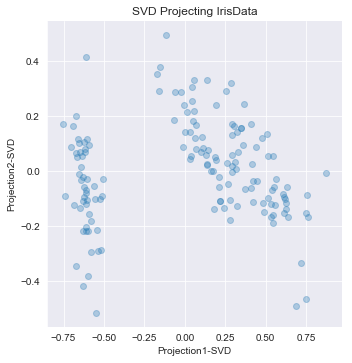

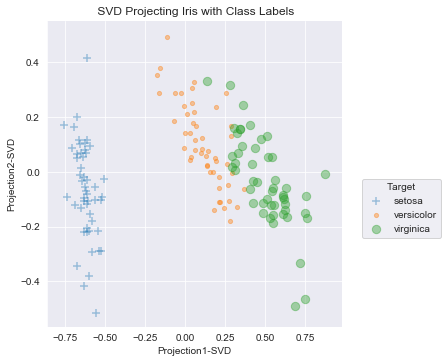

In [ ]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(2)]
names.append('target')
ds_us = pd.DataFrame(data= np.c_[u1, u2, y_values], 
                     columns=names)
ds_us['target'] = ds_us['target'].astype(int)


# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting IrisData');

# 2nd plot
ax2 = sns.lmplot('U_1', 
               'U_2', 
               data=ds_us, 
               hue='target', 
               markers=['+','.','o'],
               fit_reg=False,
               scatter_kws={'alpha':0.4, "s": 70}, 
               legend_out=False);
ax2.set(xlabel='Projection1-SVD', 
       ylabel='Projection2-SVD',
       title=' SVD Projecting Iris with Class Labels');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Target', labels = data.target_names);

Visualise the Iris data, labeled by class values, projected on the space spanned by the two leading eigenvectors of feature loadings $V$   

In [ ]:
# By SVD
projected_x= np.dot(x_norm,vh.T)
v_norm= np.dot(vh.T, vh)

names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('target')
ds_svd = pd.DataFrame(data= np.c_[projected_x[:,0:2], y_values], 
                      columns=names)
ds_svd['target'] = ds_svd['target'].astype(int)

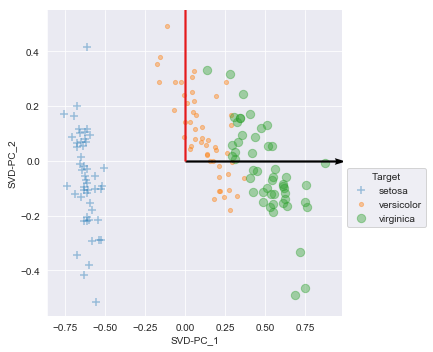

In [ ]:
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='target', 
           markers=['+','.','o'],
           fit_reg=False,
           scatter_kws={'alpha':0.4, "s": 70}, 
           legend_out=False, height=5)
plt.quiver(0, 0, v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
plt.legend(bbox_to_anchor=(1, 0.5), title='Target', labels = data.target_names);

### III Measuring the Quality of PC projections
 Each of the leading eigenvectors of V (from SVD) or PC's defines an "interesting" direction wrt the maximum variability of the Data.
 The ratio of the total variance of the Data captured by an r-projection (typically, r=2, 3) is calculated as the ratio of the sum of square of the main 'r' eigenvalues by the sum of of square of the 'p' ('p' >> 'r') eigenvalues. 

##### NOTE:  Interactive Plot of Quality of PC projection 
 *Plotly* is a solid library to do interactive plots. However, it is not possible to output interactive inline plots in Jupyter Notebooks without adding extensions. 
 
To use *plotly* you will automatically create a new html page with the corresponding plot. 

For more details, visit: https://plot.ly

In [ ]:

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
## e, v = np.linalg.eig(covmatrix)

totVar = sum(e)       #Total variability of the Data
var_exp = [(i / totVar)*100 for i in sorted(e, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        name='Exp Var',
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='Cum. Exp Var')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
plot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




'file://C:\\Users\\Administrator\\snt\\Analytics_Course\\PráticasAnalytics1516\\PCATutorial_PAD1819\\PCATutorial_Module1PAD2020\\temp-plot.html'

### Re-constructing the data from PC space

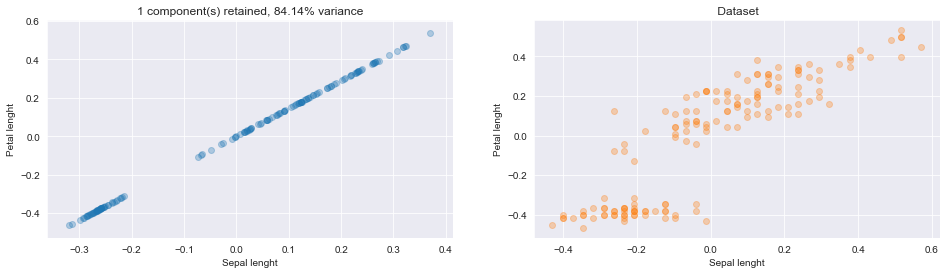

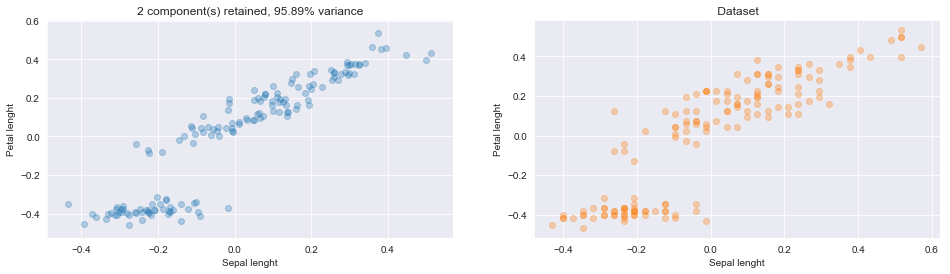

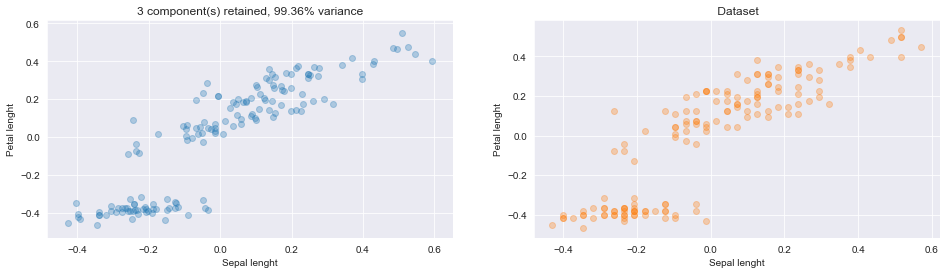

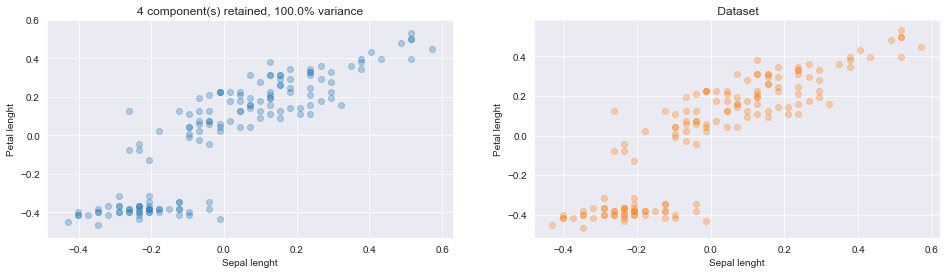

In [ ]:
r = x_values.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 3
f1=0   #Sepal lenght
f2=2   #Petal lenght

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'Sepal lenght', 
           ylabel= 'Petal lenght',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=x_norm[:,f1],
                y=x_norm[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='Sepal lenght', 
           ylabel= 'Petal lenght',
           title=' Dataset');


### Exercise
Generate a data set of $N$= 100 vectors of dimensionality $d$= 2000. The vectors stem from a Gaussian distribution with mean equal to the $d$- dimensional zero vector, and diagonal covariance matrix, $S$, having all of its nonzero elements equal to 0.1 expect $S(1,1)$ and $S(2,2)$, which are equal to 10 000. 
Apply PCA and SVD to your data and draw your conclusions.